# Linear regression with one variable
In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering diﬀerent cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.
You would like to use this data to help you select which city to expand
to next.

The file `ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a
loss. 

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
ex1datatxt="6.1101,17.592;5.5277,9.1302;8.5186,13.662;7.0032,11.854;5.8598,6.8233;8.3829,11.886;7.4764,4.3483;8.5781,12;6.4862,6.5987;5.0546,3.8166;5.7107,3.2522;14.164,15.505;5.734,3.1551;8.4084,7.2258;5.6407,0.71618;5.3794,3.5129;6.3654,5.3048;5.1301,0.56077;6.4296,3.6518;7.0708,5.3893;6.1891,3.1386;20.27,21.767;5.4901,4.263;6.3261,5.1875;5.5649,3.0825;18.945,22.638;12.828,13.501;10.957,7.0467;13.176,14.692;22.203,24.147;5.2524,-1.22;6.5894,5.9966;9.2482,12.134;5.8918,1.8495;8.2111,6.5426;7.9334,4.5623;8.0959,4.1164;5.6063,3.3928;12.836,10.117;6.3534,5.4974;5.4069,0.55657;6.8825,3.9115;11.708,5.3854;5.7737,2.4406;7.8247,6.7318;7.0931,1.0463;5.0702,5.1337;5.8014,1.844;11.7,8.0043;5.5416,1.0179;7.5402,6.7504;5.3077,1.8396;7.4239,4.2885;7.6031,4.9981;6.3328,1.4233;6.3589,-1.4211;6.2742,2.4756;5.6397,4.6042;9.3102,3.9624;9.4536,5.4141;8.8254,5.1694;5.1793,-0.74279;21.279,17.929;14.908,12.054;18.959,17.054;7.2182,4.8852;8.2951,5.7442;10.236,7.7754;5.4994,1.0173;20.341,20.992;10.136,6.6799;7.3345,4.0259;6.0062,1.2784;7.2259,3.3411;5.0269,-2.6807;6.5479,0.29678;7.5386,3.8845;5.0365,5.7014;10.274,6.7526;5.1077,2.0576;5.7292,0.47953;5.1884,0.20421;6.3557,0.67861;9.7687,7.5435;6.5159,5.3436;8.5172,4.2415;9.1802,6.7981;6.002,0.92695;5.5204,0.152;5.0594,2.8214;5.7077,1.8451;7.6366,4.2959;5.8707,7.2029;5.3054,1.9869;8.2934,0.14454;13.394,9.0551;5.4369,0.61705"

In [40]:
ex1data = np.mat(ex1datatxt)
ex1data[0:5]

matrix([[ 6.1101, 17.592 ],
        [ 5.5277,  9.1302],
        [ 8.5186, 13.662 ],
        [ 7.0032, 11.854 ],
        [ 5.8598,  6.8233]])

In [41]:
X1 = np.array(ex1data[:, 0]).flatten() # x refers to the population size in 10,000s
y1 = np.array(ex1data[:, 1]).flatten() # y refers to the profit in $10,000s
print(X1[0:5])
print(y1[0:5])

[6.1101 5.5277 8.5186 7.0032 5.8598]
[17.592   9.1302 13.662  11.854   6.8233]


## Plotting the Data
Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, you can use a scatter plot to visualize the
data, since it has only two properties to plot (profit and population). 

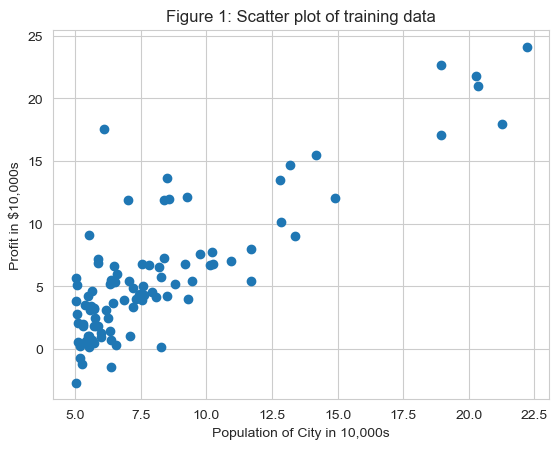

In [42]:
def plotData(X, y, theta=None):
    plt.scatter(X, y)
    if theta is not None:
        plt.plot(X, hypothesis(X, theta), color='red')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.title('Figure 1: Scatter plot of training data')
    plt.show()
plotData(X1, y1)

## Gradient Descent
In this section, you will fit the linear regression parameters $\theta$ to our dataset using **gradient descent**.

#### Update Equations
The objective of linear regression is to minimize the cost function:
$$
    J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2
$$
where the hypothesis $ h_\theta(x) $ is defined by the linear model:
$$
    h_{\theta}(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

Recall that the parameters of your model are the $ \theta_j $ values. These are the values you will adjust in order to minimize the cost function $ J(\theta) $. One common method to perform this optimization is the **batch gradient descent algorithm**.

In batch gradient descent, the parameters are updated as follows for each iteration:

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

where:

- $ \alpha $ is the learning rate
- $ m $ is the number of training examples
- $ h_{\theta}(x^{(i)}) $ is the predicted value for the $ i $-th training example
- $ y^{(i)} $ is the actual target output for the $ i $-th training example
- $ x_j^{(i)} $ denotes the feature $ j $ of the $ i $-th training example

The iteration performs these updates for all $ \theta_j $ (for $ j = 0, 1, \ldots, n )$ simultaneously in each step until convergence.

In [43]:
theta_0 = np.array([0., 0.])
theta_1 = np.array([1., 1.])

In [44]:
def hypothesis(X, theta):
    ones = np.ones(len(X))
    X_padded = np.vstack((ones, X))
    return theta.dot(X_padded)
hypothesis(X1, theta_1)

array([ 7.1101,  6.5277,  9.5186,  8.0032,  6.8598,  9.3829,  8.4764,
        9.5781,  7.4862,  6.0546,  6.7107, 15.164 ,  6.734 ,  9.4084,
        6.6407,  6.3794,  7.3654,  6.1301,  7.4296,  8.0708,  7.1891,
       21.27  ,  6.4901,  7.3261,  6.5649, 19.945 , 13.828 , 11.957 ,
       14.176 , 23.203 ,  6.2524,  7.5894, 10.2482,  6.8918,  9.2111,
        8.9334,  9.0959,  6.6063, 13.836 ,  7.3534,  6.4069,  7.8825,
       12.708 ,  6.7737,  8.8247,  8.0931,  6.0702,  6.8014, 12.7   ,
        6.5416,  8.5402,  6.3077,  8.4239,  8.6031,  7.3328,  7.3589,
        7.2742,  6.6397, 10.3102, 10.4536,  9.8254,  6.1793, 22.279 ,
       15.908 , 19.959 ,  8.2182,  9.2951, 11.236 ,  6.4994, 21.341 ,
       11.136 ,  8.3345,  7.0062,  8.2259,  6.0269,  7.5479,  8.5386,
        6.0365, 11.274 ,  6.1077,  6.7292,  6.1884,  7.3557, 10.7687,
        7.5159,  9.5172, 10.1802,  7.002 ,  6.5204,  6.0594,  6.7077,
        8.6366,  6.8707,  6.3054,  9.2934, 14.394 ,  6.4369])

In [45]:
def J(X, y, theta):
    m = len(y)
    ones = np.ones(len(X))
    X_padded = np.vstack((ones, X))
    hypothesis = theta.dot(X_padded)
    return np.sum(np.square(hypothesis - y)) / (2*m)
J(X1, y1, theta_0)

32.072733877455676

### Gradient descent
Next, you will implement gradient descent.
The loop structure has been written for you, and you only need to supply
the updates to θ within each iteration.

What you are trying to optimize and what is being updated. Keep in mind that the cost J(θ) is parameterized by the vector θ, not X and y. That is, we minimize the value of J(θ)
by changing the values of the vector θ, not by changing X or y. Refer to the
equations in this handout and to the video lectures if you are uncertain.
A good way to verify that gradient descent is working correctly is to look
at the value of J(θ) and check that it is decreasing with each step. 
The
starter code for gradientDescent.m calls computeCost on every iteration
and prints the cost. Assuming you have implemented gradient descent and
computeCost correctly, your value of J(θ) should never increase, and should
converge to a steady value by the end of the algorithm.

In [46]:
def grad(X, y, theta):
    m = len(y)
    ones = np.ones(len(X))
    X_padded = np.vstack((ones, X))
    hypothesis = theta.dot(X_padded)
    grads = X_padded.dot(hypothesis - y)
    return grads/m
grad(X1, y1, theta_0)

array([ -5.83913505, -65.32884975])

In [50]:
def grad_descent(X, y, theta_0=np.array([0.0, 0.0]), learning_rate=0.01, iterations=1000):
    thetas = [theta_0.copy()]
    Js = [J(X, y, theta_0)]
    for i in range(iterations):
        gradient = grad(X, y, theta_0) # Compute the gradient for all parameters at once
        theta_0 -= learning_rate * gradient # Update all parameters at once
        thetas.append(theta_0.copy())
        Js.append(J(X, y, theta_0))
            
    print(f"J: {J(X, y, theta_0):.4f}")
    print(f"theta: {theta_0}")
    result = {'theta': theta_0, 'thetas': thetas, 'costs':Js}
    return result

In [48]:
def grad_descent(X, y, theta_0=np.array([0.0, 0.0]), learning_rate=0.01, iterations=1500):
    thetas = [theta_0.copy()]
    Js = [J(X, y, theta_0)]
    for i in range(iterations):
        theta_temp = np.zeros(len(theta_0))
        for j in range(len(theta_0)):
            gradient = grad(X, y, thetas[-1])
            theta_temp[j] = thetas[-1][j] - learning_rate * gradient
        thetas.append(theta_temp.copy())
        Js.append(J(X, y, theta_temp))

    print(f"J: {J(X, y, theta_temp):.4f}")
    print(f"theta: {theta_temp}")
    result = {'theta': theta_temp, 'thetas': thetas, 'costs':Js}
    return result

In [51]:
theta = grad_descent(X1, y1)['theta']
theta

J: 4.5160
theta: [-3.24140214  1.1272942 ]


array([-3.24140214,  1.1272942 ])

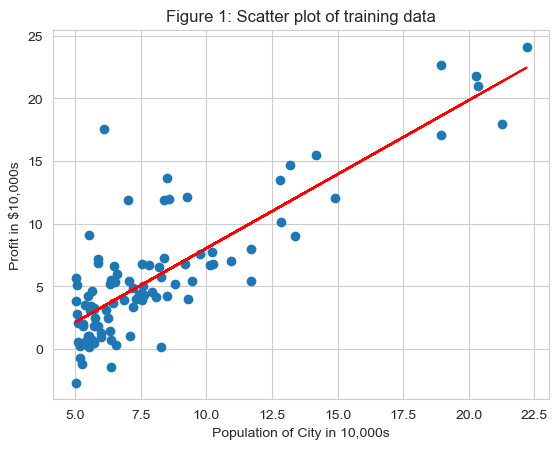

In [36]:
plotData(X1, y1, theta)

## Visualizing J(θ)
To understand the cost function J(θ) better, you will now plot the cost over
a 2-dimensional grid of θ0 and θ1 values. 

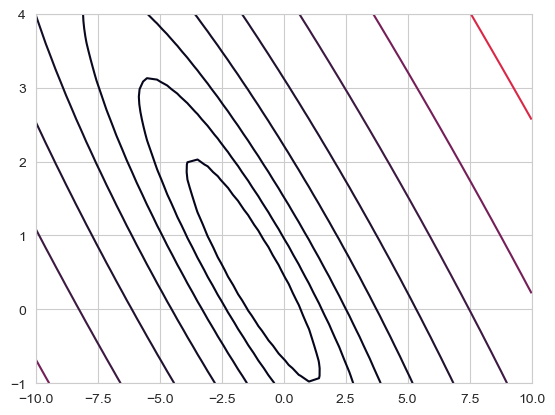

In [16]:
theta0 = np.linspace(-10, 10)
theta1 = np.linspace(-1, 4)
J_vals = np.zeros((len(theta0), len(theta1)))

for i in range(len(theta0)):
    for j in range(len(theta1)):
        J_vals[i, j] = J(X1, y1, np.array([theta0[i], theta1[j]]))

plt.contour(theta0, theta1, J_vals, levels=np.logspace(-2, 3, 20))

## Using SK Learn library to do same linear regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()

# Train the model
X_T = X1.reshape(-1, 1)
model.fit(X_T, y1)
# Make predictions
y_pred = model.predict(X_T)

# Evaluate the model
mse = mean_squared_error(y1, y1)
r2 = r2_score(y1, y1)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Print model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Mean Squared Error: 0.0
R^2 Score: 1.0
Intercept: -3.8957808783118537
Coefficients: [1.19303364]


In [19]:
# cost of sklearn model is better than of the above algorithm
J(X1, y1, np.array([-3.89, 1.19]))

4.477219565919556

# Linear regression with multiple variables
In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.

The file `ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [20]:
ex2datatxt = "2104,3,399900;1600,3,329900;2400,3,369000;1416,2,232000;3000,4,539900;1985,4,299900;1534,3,314900;1427,3,198999;1380,3,212000;1494,3,242500;1940,4,239999;2000,3,347000;1890,3,329999;4478,5,699900;1268,3,259900;2300,4,449900;1320,2,299900;1236,3,199900;2609,4,499998;3031,4,599000;1767,3,252900;1888,2,255000;1604,3,242900;1962,4,259900;3890,3,573900;1100,3,249900;1458,3,464500;2526,3,469000;2200,3,475000;2637,3,299900;1839,2,349900;1000,1,169900;2040,4,314900;3137,3,579900;1811,4,285900;1437,3,249900;1239,3,229900;2132,4,345000;4215,4,549000;2162,4,287000;1664,2,368500;2238,3,329900;2567,4,314000;1200,3,299000;852,2,179900;1852,4,299900;1203,3,239500"

In [21]:
ex2data = np.mat(ex2datatxt)
ex2data[0:5]

matrix([[  2104,      3, 399900],
        [  1600,      3, 329900],
        [  2400,      3, 369000],
        [  1416,      2, 232000],
        [  3000,      4, 539900]])

In [22]:
X2 = np.array(ex2data[:, 0:-1])
y2 = np.array(ex2data[:, -1]).flatten()
print(X2[0:5])
print(y2[0:5])

[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]]
[399900 329900 369000 232000 539900]


## Feature Normalization
By looking at the values, note that house sizes are about
1000 times the number of bedrooms. When features diﬀer by orders of magnitude, first performing feature scaling can make gradient descent converge
much more quickly.

Your task here is to complete the code in featureNormalize.m to
• Subtract the mean value of each feature from the dataset.
• After subtracting the mean, additionally scale (divide) the feature values
by their respective “standard deviations.”

In [23]:
def normalize(arr):
    arr_mean = np.mean(arr)
    arr_std = np.std(arr)
    return (arr - arr_mean) / arr_std
normalize(X2)

array([[ 9.64150080e-01, -8.73910212e-01],
       [ 5.23225574e-01, -8.73910212e-01],
       [ 1.22310574e+00, -8.73910212e-01],
       [ 3.62253135e-01, -8.74785062e-01],
       [ 1.74801587e+00, -8.73035361e-01],
       [ 8.60042905e-01, -8.73035361e-01],
       [ 4.65485460e-01, -8.73910212e-01],
       [ 3.71876488e-01, -8.73910212e-01],
       [ 3.30758528e-01, -8.73910212e-01],
       [ 4.30491452e-01, -8.73910212e-01],
       [ 8.20674646e-01, -8.73035361e-01],
       [ 8.73165658e-01, -8.73910212e-01],
       [ 7.76932135e-01, -8.73910212e-01],
       [ 3.04104448e+00, -8.72160511e-01],
       [ 2.32775304e-01, -8.73910212e-01],
       [ 1.13562072e+00, -8.73035361e-01],
       [ 2.78267515e-01, -8.74785062e-01],
       [ 2.04780098e-01, -8.73910212e-01],
       [ 1.40594944e+00, -8.73035361e-01],
       [ 1.77513622e+00, -8.73035361e-01],
       [ 6.69325559e-01, -8.73910212e-01],
       [ 7.75182435e-01, -8.74785062e-01],
       [ 5.26724975e-01, -8.73910212e-01],
       [ 8.

## Gradient Descent
Previously, you implemented gradient descent on a univariate regression
problem. The only diﬀerence now is that there is one more feature in the
matrix X. The hypothesis function and the batch gradient descent update
rule remain unchanged.
You should complete the code in computeCostMulti.m and gradientDescentMulti.m
to implement the cost function and gradient descent for linear regression with
multiple variables. If your code in the previous part (single variable) already
supports multiple variables, you can use it here too.
Make sure your code supports any number of features and is well-vectorized.
You can use ‘size(X, 2)’ to find out how many features are present in the
dataset.

In [24]:
def J(X, y, theta):
    theta = np.array(theta)
    m = len(y)
    ones = np.ones(len(X))
    X_padded = np.vstack((ones, X.T))
    hypothesis  = theta.dot(X_padded)
    return np.sum(np.square(hypothesis - y)) / (2*m)
J(X2, y2, [1, 1, 1])

64828197300.797874

In [25]:
def gradient(X, y, theta):
    theta = np.array(theta)
    m = len(y)
    ones = np.ones(len(X))
    X_padded = np.vstack((ones, X.T))
    hypothesis  = theta.dot(X_padded)
    grads = X_padded.dot(hypothesis - y)
    return grads/m
gradient(X2, y2, [1, 1, 1]) 

array([-3.38407809e+05, -7.59579615e+08, -1.11367989e+06])

In [26]:
def gradient_descent(X, y, theta_0=None, learning_rate=0.01, iterations=1000):
    if theta_0 is None:
        theta_0 = np.zeros(X.shape[1] + 1)
    else:
        theta_0 = np.array(theta_0)
    thetas = [theta_0.copy()]
    Js = [J(X, y, theta_0)]
    for i in range(iterations):
        grad = gradient(X, y, theta_0) # Compute the gradient for all parameters at once
        theta_0 -= grad * learning_rate# Update all parameters at once
        thetas.append(theta_0.copy())
        Js.append(J(X, y, theta_0))

    print(f"J: {J(X, y, theta_0):.4f}")
    print(f"theta: {theta_0}")
    result = {'theta': theta_0, 'thetas': thetas, 'costs':Js}
    return result

In [27]:
gr = gradient_descent(normalize(X2), y2)

J: 2058000677.1045
theta: [ 117312.58404498  153003.61412252 -102505.55800857]


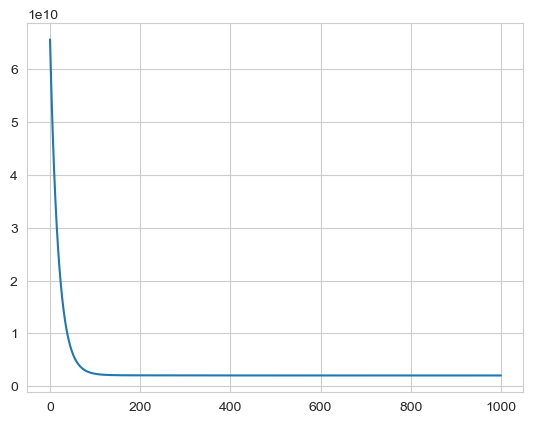

In [28]:
plt.plot(gr['costs'])

## Normal Equations
In the lecture videos, you learned that the closed-form solution to linear
regression is:
$$ \theta = (X^T X)^{-1} X^T \vec{y}$$
Using this formula does not require any feature scaling, and you will get
an exact solution in one calculation: there is no “loop until convergence” like
in gradient descent.
Complete the code in normalEqn.m to use the formula above to calcu-
late θ. Remember that while you don’t need to scale your features, we still
need to add a column of 1’s to the X matrix to have an intercept term (θ0).
The code in ex1.m will add the column of 1’s to X for you.
You should now submit your solutions.

In [29]:
def normal_equation(X, y):
    ones = np.ones(len(X))
    X = np.vstack((ones, X.T)).T
    term1 = np.power(X.T.dot(X), -1)
    print(term1)
    term2 = X.T.dot(y)
    print(term2)
    return term1.dot(term2)

In [30]:
normal_equation(X1, y1)

[[0.01030928 0.00126342]
 [0.00126342 0.00012664]]
[ 566.3961     6336.89842532]


array([13.84531777,  1.51812466])

In [31]:
J(X1, y1, [13.84531777,  1.51812466])

213.2132322479053

In [32]:
normal_equation(X2, y2)

[[2.12765957e-02 1.06346776e-05 6.71140940e-03]
 [1.06346776e-05 4.60448814e-09 3.18797242e-06]
 [6.71140940e-03 3.18797242e-06 2.00400802e-03]]
[1.5999395e+07 3.5917829e+10 5.2657282e+07]


array([1.07579177e+06, 5.03401587e+02, 3.27409153e+05])